In [2]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [3]:
# Cell 2: Load Results File
results_file = "all_model_results.csv"
df = pd.read_csv(results_file)

# Ensure column order is correct
expected_cols = ["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1-Score", "auc-roc", "TP", "TN", "FP", "FN"]
df = df[expected_cols]

# Display results
df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,Specificity,F1-Score,auc-roc,TP,TN,FP,FN
0,InceptionV3,0.990000,0.990156,0.990000,0.996667,0.989986,0.999731,1188,3588,12,12
1,VGG19,0.988333,0.988432,0.988333,0.996111,0.988327,0.999130,1186,3586,14,14
2,VGG16,0.945833,0.947089,0.945833,0.981944,0.945281,0.996893,1135,3535,65,65
3,MobileNetV2,0.945000,0.948399,0.945000,0.981667,0.945213,0.996789,1134,3534,66,66
4,EfficientNetB0,0.916667,0.918259,0.916667,0.972222,0.915346,0.991952,1100,3500,100,100
5,DarkNet53,0.842500,0.850295,0.842500,0.947500,0.838295,0.971245,1011,3411,189,189
6,ResNet50,0.303333,0.265031,0.303333,0.767778,0.190509,0.696659,364,2764,836,836


In [4]:
# Cell 3: Get Top 3 Models
top3_df = df.sort_values(by="Accuracy", ascending=False).head(3).reset_index(drop=True)
top3_models = top3_df["Model"].tolist()
print("Top 3 Models based on Accuracy:", top3_models)

Top 3 Models based on Accuracy: ['InceptionV3', 'VGG19', 'VGG16']


<Figure size 1200x600 with 0 Axes>

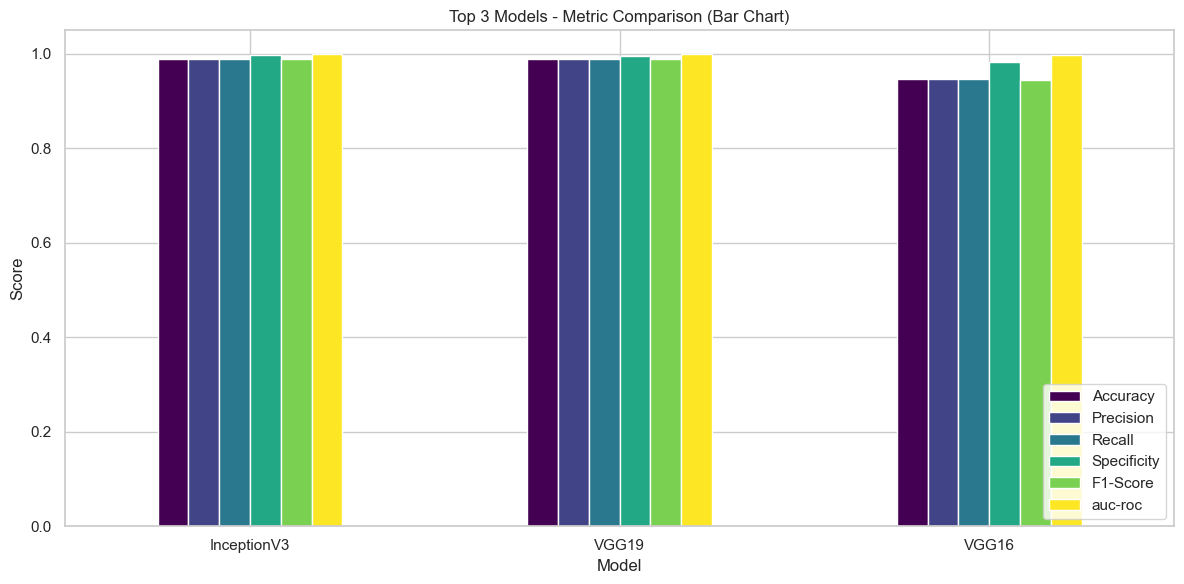

In [5]:
# Cell 4: Bar Chart Comparison of Metrics
metrics = ["Accuracy", "Precision", "Recall", "Specificity", "F1-Score", "auc-roc"]

plt.figure(figsize=(12, 6))
top3_df.set_index("Model")[metrics].plot(kind='bar', figsize=(12, 6), colormap="viridis")
plt.title("Top 3 Models - Metric Comparison (Bar Chart)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("top3_model_comparison_bar.png")
plt.show()

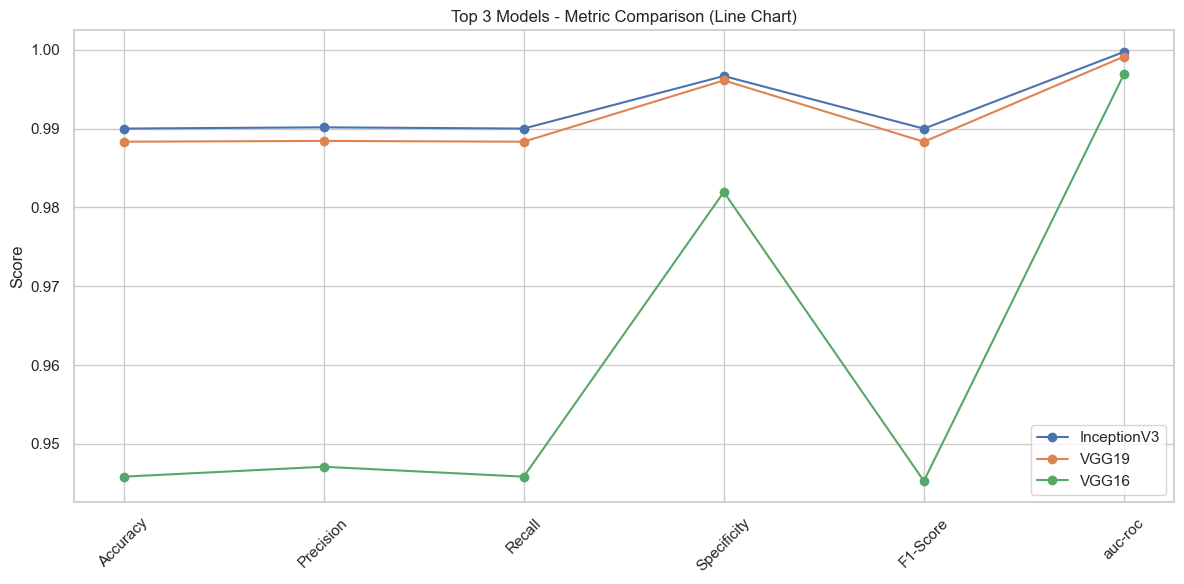

In [6]:
# Cell 5: Line Chart Comparison of Metrics
plt.figure(figsize=(12, 6))
for index, row in top3_df.iterrows():
    plt.plot(metrics, row[metrics], marker='o', label=row["Model"])

plt.title("Top 3 Models - Metric Comparison (Line Chart)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("top3_model_comparison_line.png")
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_3156\3351363573.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')


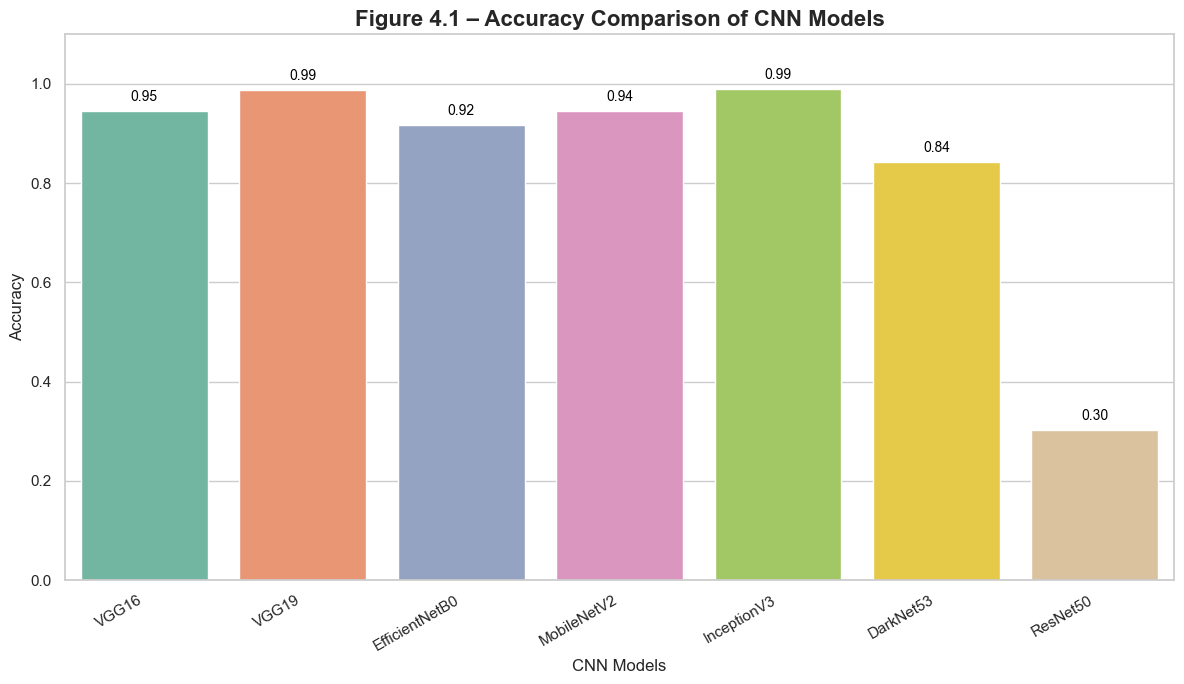

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean results
results_df = pd.read_csv("all_model_results.csv")

# Drop rows where 'Accuracy' is missing
results_df = results_df.dropna(subset=["Accuracy"])

# Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
barplot = sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')

# Rotate x-labels for readability
plt.xticks(rotation=30, ha='right')

# Title and labels
plt.title("Figure 4.1 – Accuracy Comparison of CNN Models", fontsize=16, fontweight='bold')
plt.xlabel("CNN Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Adjust y-axis
plt.ylim(0, 1.1)

# Annotate accuracy values above bars
for index, row in results_df.iterrows():
    barplot.text(index, row['Accuracy'] + 0.02, f"{row['Accuracy']:.2f}", 
                 color='black', ha='center', fontsize=10)

# Save and display
plt.tight_layout()
plt.savefig("figure_4_1_accuracy_comparison.png", dpi=300)
plt.show()

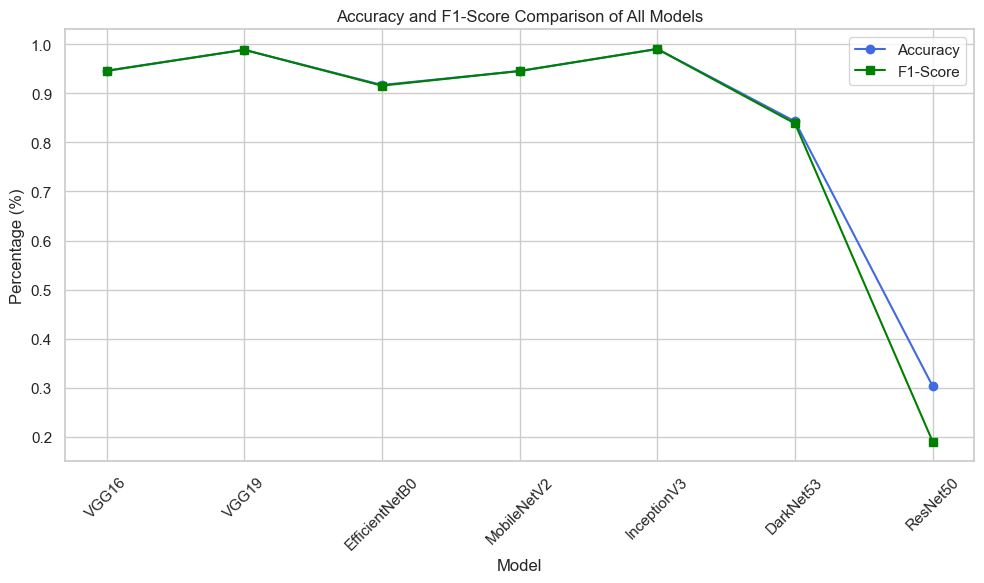

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your results file
df = pd.read_csv("all_model_results.csv") 

# Plot Accuracy and F1-Score
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy', color='royalblue')
plt.plot(df['Model'], df['F1-Score'], marker='s', label='F1-Score', color='green')
plt.title('Accuracy and F1-Score Comparison of All Models')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Accuracy_F1_Line_Plot.png")
plt.show()

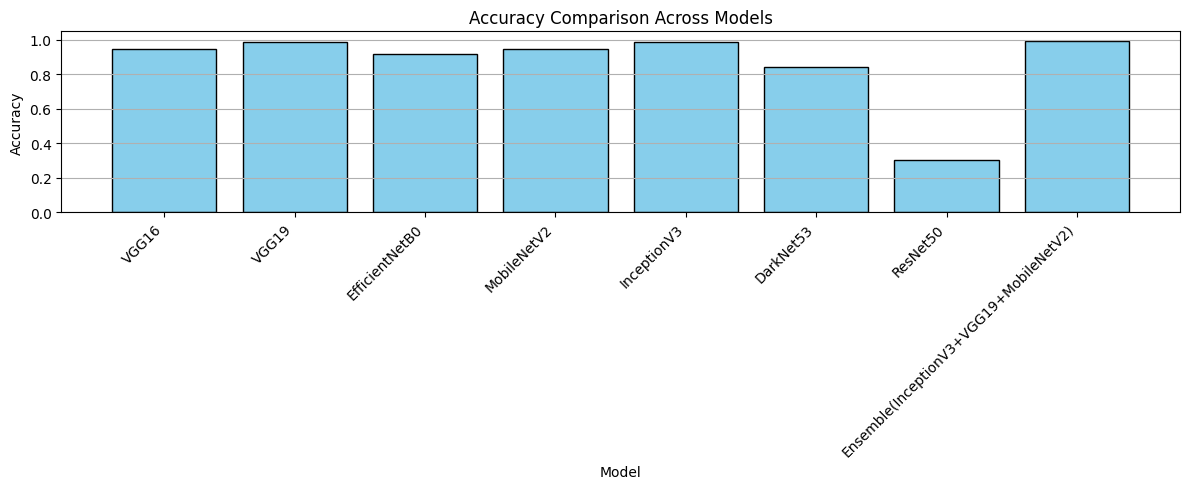

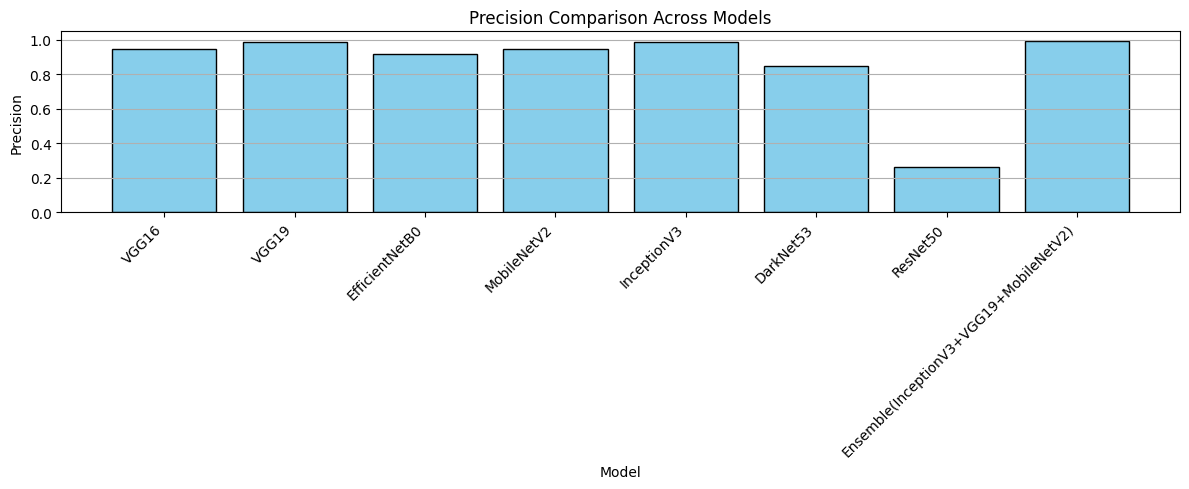

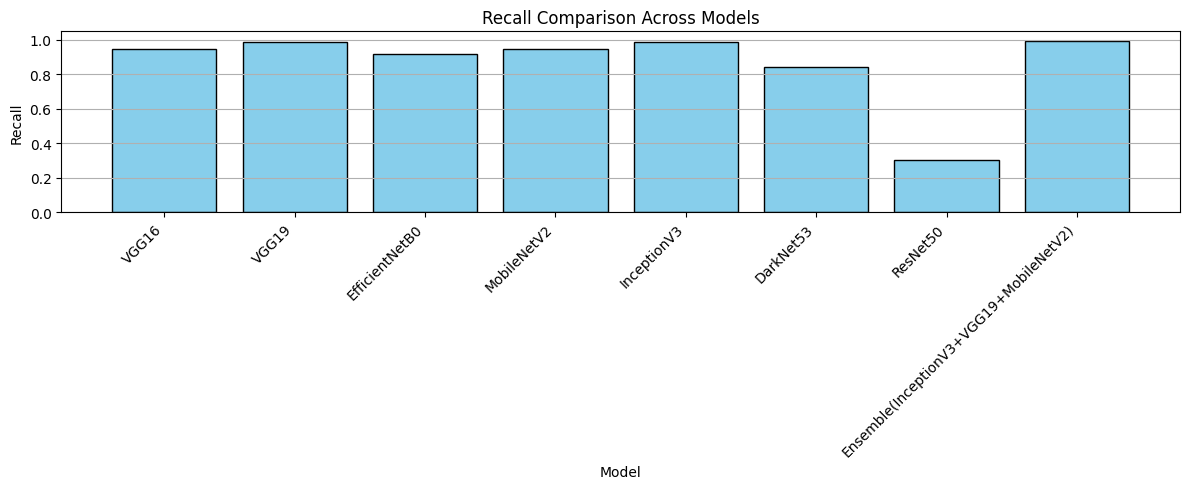

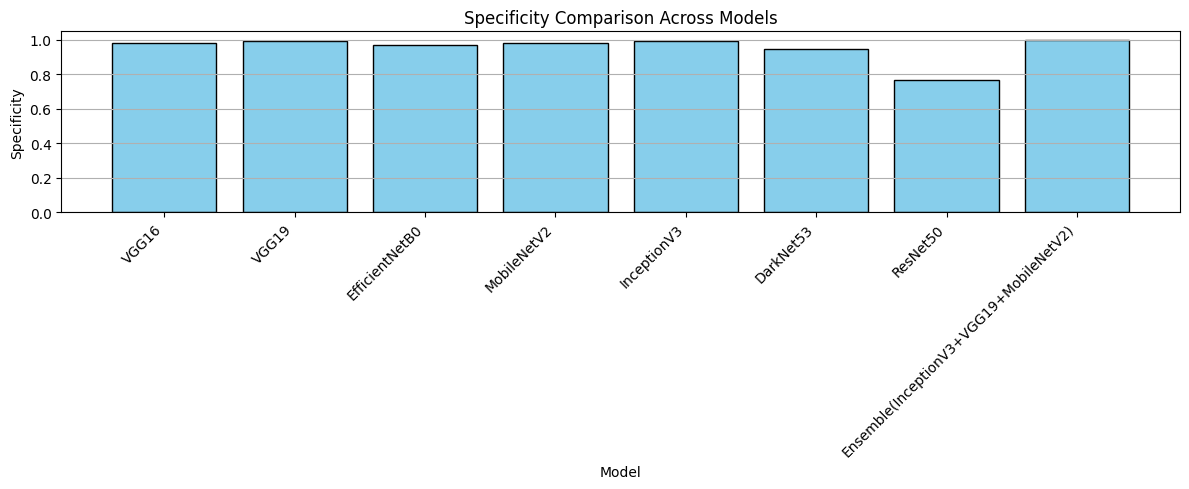

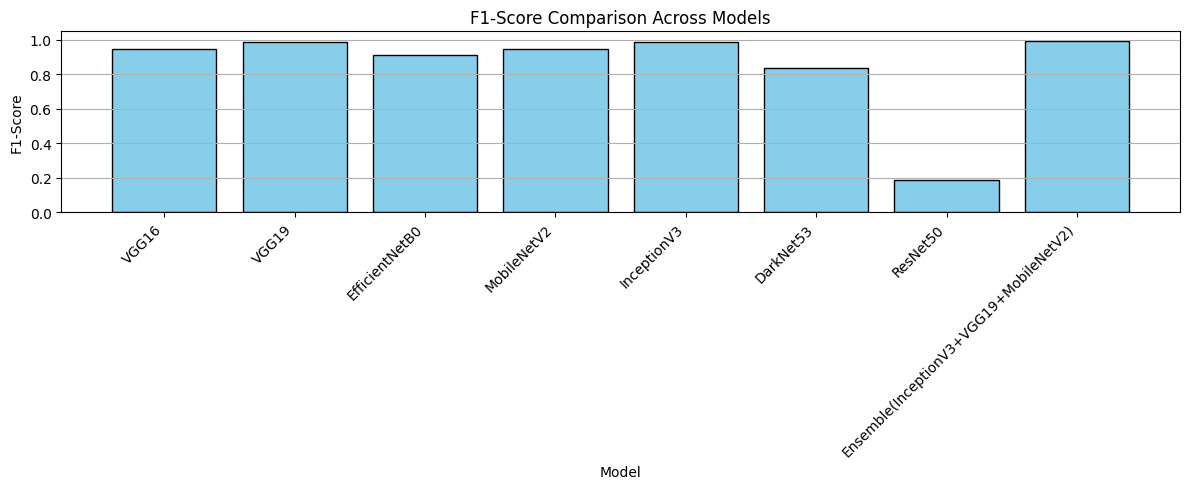

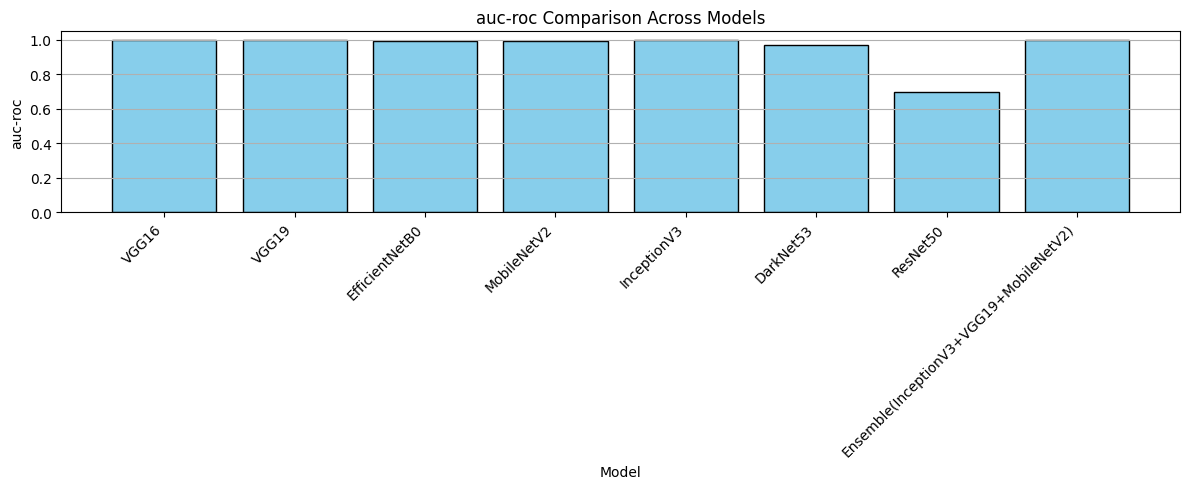

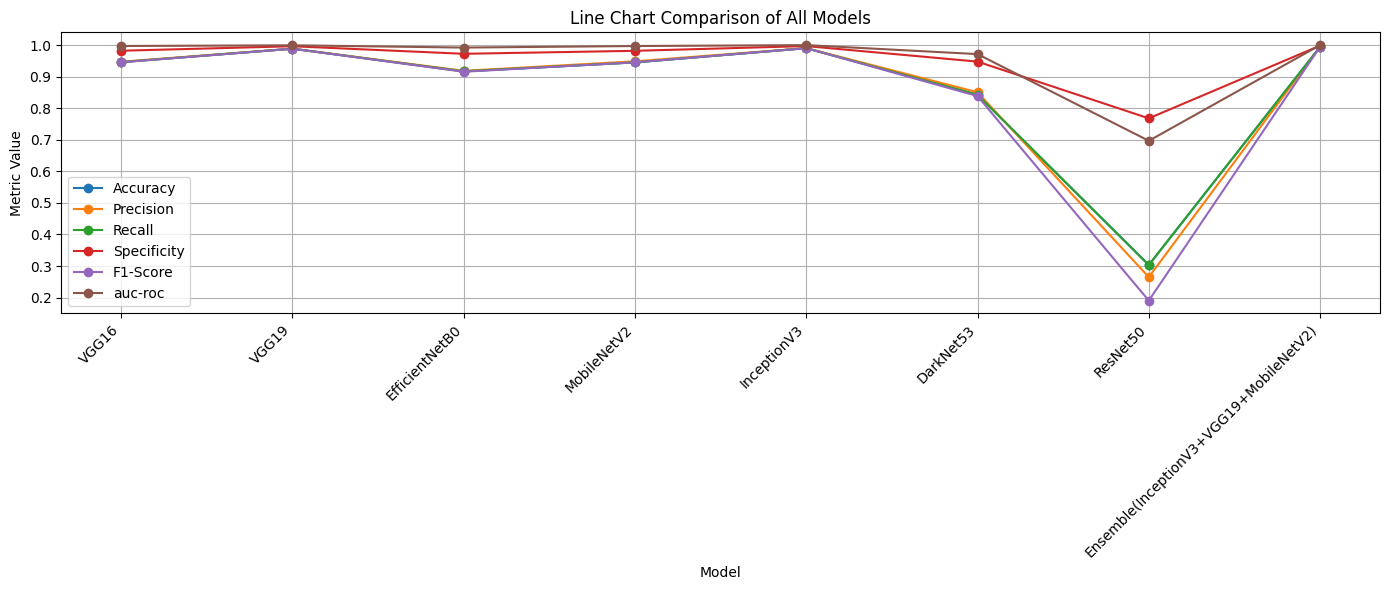

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load updated results file
results_df = pd.read_csv("all_model_results.csv")

# List of models
models = results_df["Model"]

# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "Specificity", "F1-Score", "auc-roc"]

# Plot bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(12, 5))
    plt.bar(models, results_df[metric], color='skyblue', edgecolor='black')
    plt.title(f"{metric} Comparison Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.savefig(f"{metric}_bar_comparison.png")
    plt.show()

# Line chart for all metrics together
plt.figure(figsize=(14, 6))
for metric in metrics:
    plt.plot(models, results_df[metric], marker='o', label=metric)

plt.title("Line Chart Comparison of All Models")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("all_metrics_line_comparison.png")
plt.show()

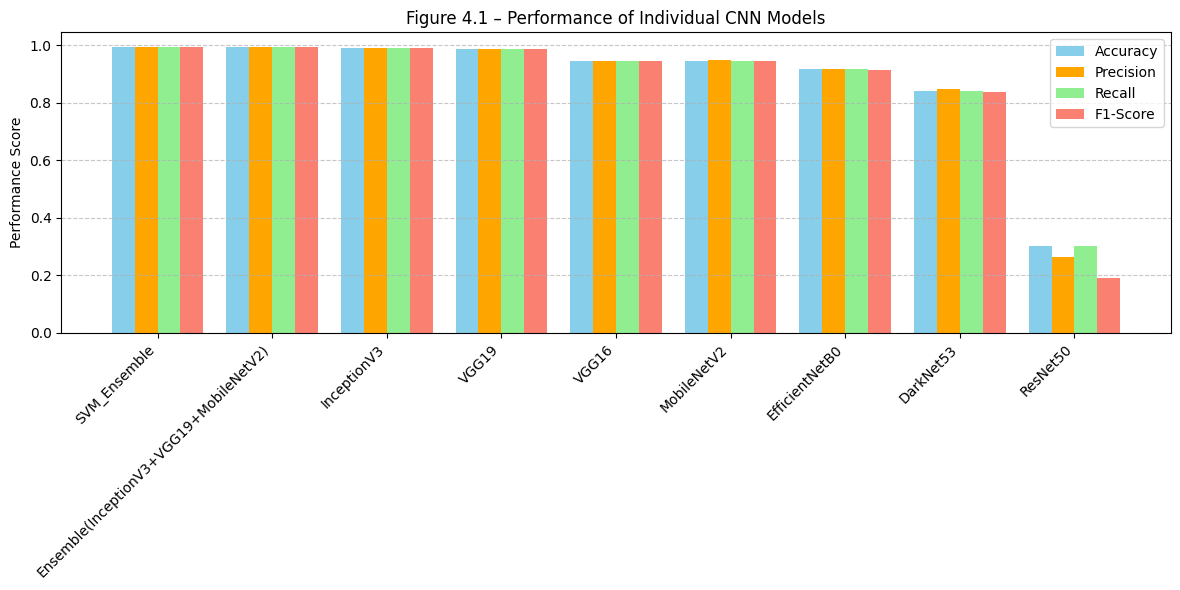

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results file
df = pd.read_csv('all_model_results.csv')

# Sort models by Accuracy (optional, for better visualization)
df = df.sort_values(by='Accuracy', ascending=False)

# Set plot style
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'orange', 'lightgreen', 'salmon']

# Plot grouped bar chart
x = df['Model']
x_axis = range(len(x))
bar_width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(
        [p + bar_width * i for p in x_axis],
        df[metric],
        width=bar_width,
        label=metric,
        color=colors[i]
    )

# Customizing plot
plt.xticks([p + bar_width * 1.5 for p in x_axis], x, rotation=45, ha='right')
plt.ylabel("Performance Score")
plt.title("Figure 4.1 – Performance of Individual CNN Models")
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

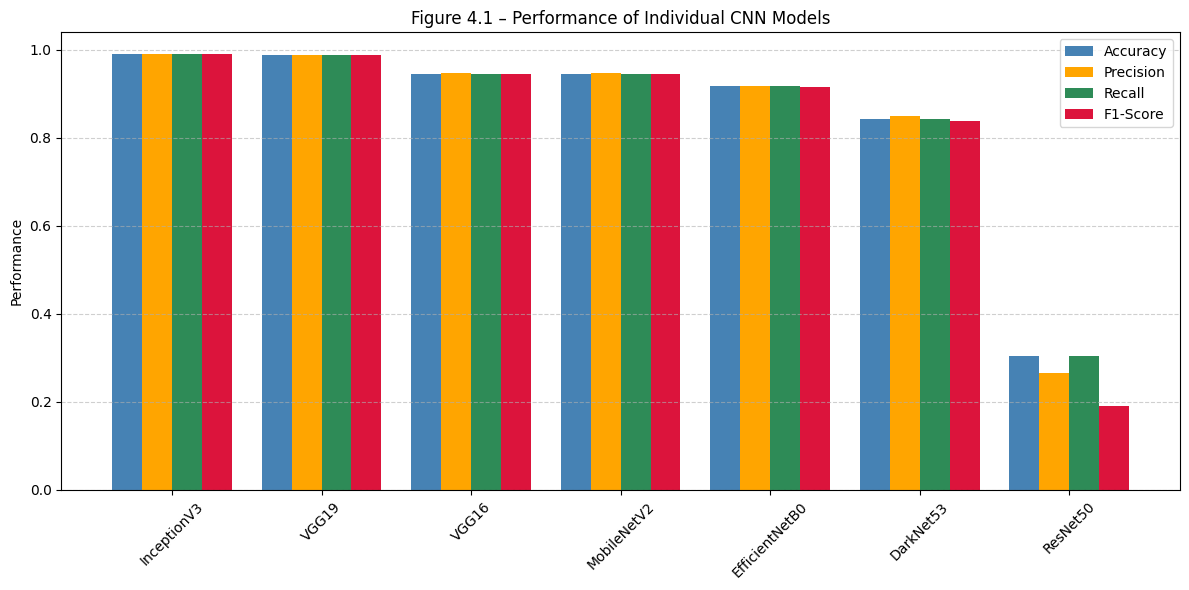

Bar chart saved to: D:\Figure_4.1_CNN_Model_Performance.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load results
df = pd.read_csv('all_model_results.csv')  

# CNN models only
cnn_models = [
    'VGG16', 'VGG19', 'ResNet50', 'EfficientNetB0',
    'MobileNetV2', 'InceptionV3', 'DarkNet53'
]

df_cnn = df[df['Model'].isin(cnn_models)].copy()
df_cnn.sort_values(by='Accuracy', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['steelblue', 'orange', 'seagreen', 'crimson']
x = df_cnn['Model']
x_axis = range(len(x))
bar_width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(
        [p + bar_width * i for p in x_axis],
        df_cnn[metric],
        width=bar_width,
        label=metric,
        color=colors[i]
    )

# X-axis labels
plt.xticks([p + bar_width * 1.5 for p in x_axis], x, rotation=45)
plt.ylabel("Performance")
plt.title("Figure 4.1 – Performance of Individual CNN Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save figure (change to any valid Windows path)
save_path = r"D:\Figure_4.1_CNN_Model_Performance.png"
plt.savefig(save_path, dpi=300)
plt.show()

print(f"Bar chart saved to: {save_path}")